# Lab 06 
## Part 1: 
Final project sign up sheet: https://docs.google.com/spreadsheets/d/1BoPgqvE80VzNXYSIblf27IF29cja8x9oFpifQ6QqHs4/edit?usp=sharing

* Note 1: Each team should have 3-4 members. Please do not form team with single member.
* Note 2: This sheet is just for forming teams, please do not start working on the project yet, we may modify the dataset slightly.
* Note 3: Only students from the same lab could form one team.
* Note 4: The 4 data sets below are from last year's final project. 

[Dataset 1: NFL play-by-play data [link]](https://www.kaggle.com/maxhorowitz/nflplaybyplay2015/data)

[Dataset 2: Learning to code [link]](https://github.com/freeCodeCamp/2017-new-coder-survey)

[Dataset 3: Chicago traffic [link]](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if)

[Dataset 4: Hotel Data [link]](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

**More information about the final project will be announced in the next two labs (11/3/2021 and 11/10/2021).**

**Please attend the lab session next two weeks**

## Part 2: Review left_join() and relational data

In [2]:
library(MASS)
library(tidyverse)
library(ISLR)
library(nycflights13)

### Important concepts:

**Primary key**: A *primary key* is a variable (or set of variables) that uniquely identifies an observation in its own table: there is **at most** one row in the table that corresponds to any setting of the columns which comprise the key.

**Relations**:
A primary key and the corresponding foreign key in another table form a *relation*. Relations come in several forms:
- *One-to-many*. (Most common). For example, each flight has one plane, but each plane has many flights. 
- *Many-to-many*: For example, each airline flies to many airports; each airport hosts many airlines.
- *One-to-one*. Each row in one table corresponds uniquely to a row in a second table. This is relatively uncommon because you could just as easily combine the two tables into one.

### Different types of joins:

**Inner joins**
Inner joins match a pair of observations whenever their keys are equal.

**Outer joins**
An outer join keeps observations that appear in at least one of the tables. There are three types of outer joins:
- A left join keeps all observations in x.
- A right join keeps all observations in y.
- A full join keeps all observations in x and y.

**Semi-join**
`semi_join(x, y)` keeps all the observations in `x` that are also in `y`.

**Anti-join**
The opposite of a semi-join is an anti-join.

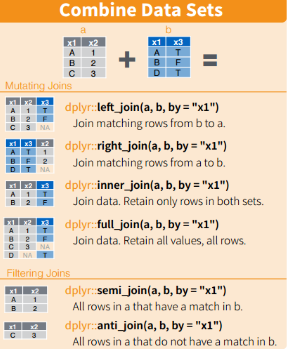

### Duplicate keys:
1. One table has duplicate keys. This is useful when you want to add in additional information as there is typically a one-to-many relationship. ![duplicate keys](http://r4ds.had.co.nz/diagrams/join-one-to-many.png)

In [9]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     1, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2"
)

In [10]:
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x3,y2
1,x4,y1


2. Both tables have duplicate keys

This represents a many-to-many join and is usually an error since the key does not uniquely identify observations in either table. Joining duplicated keys results in the Cartesian product of all the possible matches:
![cartesian](http://r4ds.had.co.nz/diagrams/join-many-to-many.png)

In [11]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     3, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     2, "y3",
     3, "y4"
)


In [12]:
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x2,y3
2,x3,y2
2,x3,y3
3,x4,y4


### Defining the key columns
When we do a join using `left_join()`, R take as the key whatever column names the two tables have in common:

In [13]:
flights2 <- flights %>% 
  select(year:day, hour, origin, dest, tailnum, carrier)

![table relationships](http://r4ds.had.co.nz/diagrams/relational-nycflights.png)
The particular relationships in this database are:
- `flights` connects to `planes` via `tailnum`.
- `flights` connects to `airlines` via `carrier`.
- `flights` connects to `airports` twice: via `origin` and `dest`.
- `flights` connects to `weather` via `origin` (the location), and `year`, `month`, `day` and `hour`.

1. The default, by = NULL, uses all variables that appear in both tables, the so called natural join. For example, the flights and weather tables match on their common variables: year, month, day, hour and origin.

In [14]:
flights2 %>% 
  left_join(weather)

Joining, by = c("year", "month", "day", "hour", "origin")



year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250,14.96014,21.86482,0,1011.4,10,2013-01-01 05:00:00
2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,5,EWR,ORD,N39463,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,6,EWR,FLL,N516JB,B6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00
2013,1,1,6,LGA,IAD,N829AS,EV,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,6,JFK,MCO,N593JB,B6,37.94,26.96,64.29,260,13.80936,NA,0,1012.6,10,2013-01-01 06:00:00


2. A character vector, by = "x". This is like a natural join, but uses only some of the common variables. For example, flights and planes have year variables, but they mean different things so we only want to join by tailnum.

In [19]:
unique(flights$year)
unique(planes$year)

# https://rdrr.io/cran/nycflights13/man/flights.html

[1] 2013

[1] 2004 1998 1999 2002 2003 2005 2006 2000 2001 1994 1995 1996 1987 2009 2010
[16] 1991 1997   NA 1965 2007 1990 2013 2008 1992 1993 1959 1980 2011 2012 1988
[31] 1985 1986 1989 1973 1978 1963 1956 1972 1968 1975 1979 1983 1976 1984 1967
[46] 1977 1974

In [20]:
flights2 %>% 
  left_join(planes, by = "tailnum")

year.x,month,day,hour,origin,dest,tailnum,carrier,year.y,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,LGA,IAH,N24211,UA,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,JFK,MIA,N619AA,AA,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,5,JFK,BQN,N804JB,B6,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,ATL,N668DN,DL,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,5,EWR,ORD,N39463,UA,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan
2013,1,1,6,EWR,FLL,N516JB,B6,2000,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,IAD,N829AS,EV,1998,Fixed wing multi engine,CANADAIR,CL-600-2B19,2,55,NA,Turbo-fan
2013,1,1,6,JFK,MCO,N593JB,B6,2004,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan


Note that the year variables (which appear in both input data frames, but are not constrained to be equal) are disambiguated in the output with a suffix.

3. A named character vector: by = c("a" = "b"). This will match variable a in table x to variable b in table y. The variables from x will be used in the output. For example, if we want to draw a map we need to combine the flights data with the airports data which contains the location (lat and lon) of each airport. Each flight has an origin and destination airport, so we need to specify which one we want to join to:

In [22]:
flights2 %>% 
  left_join(airports, c("dest" = "faa")) %>% head()

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,LGA,IAH,N24211,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,JFK,MIA,N619AA,AA,Miami Intl,25.79325,-80.29056,8,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,NA,NA,NA,NA,NA,NA,NA
2013,1,1,6,LGA,ATL,N668DN,DL,Hartsfield Jackson Atlanta Intl,33.63672,-84.42807,1026,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago


In [23]:
flights2 %>% 
  left_join(airports, c("origin" = "faa")) %>% head()

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,5,LGA,IAH,N24211,UA,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,JFK,MIA,N619AA,AA,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,6,LGA,ATL,N668DN,DL,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
